In [11]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [12]:
#Data
data = pd.read_csv("data/test.csv")
filter_df = data.copy()

In [13]:
def visualise_whole():
    plt.figure(figsize=(15,20))
    p1 = plt.subplot(4,1,1)
    p2 = plt.subplot(4,1,2)
    p3 = plt.subplot(4,1,3)
    p4 = plt.subplot(4,1,4)
    p1.plot(data['ax (m/s^2)'])
    p1.plot(filter_df['ax (m/s^2)'])
    p2.plot(data['ay (m/s^2)'])
    p2.plot(filter_df['ay (m/s^2)'])
    p3.plot(data['az (m/s^2)'])
    p3.plot(filter_df['az (m/s^2)'])
    p4.plot(data['aT (m/s^2)'])
    p4.plot(filter_df['aT (m/s^2)'])
    plt.show()

In [4]:
def viz_sample():
    plt.figure(figsize=(15,5))
    plt.plot(filter_df['ay (m/s^2)'])
    plt.show()

In [5]:
def bw_filter(data):
    order = 3
    nyq = 0.5 * 160
    high = 5 / nyq
    b, a = signal.butter(order, high, btype='lowpass')
    low_passed = signal.filtfilt(b, a, data)
    return low_passed

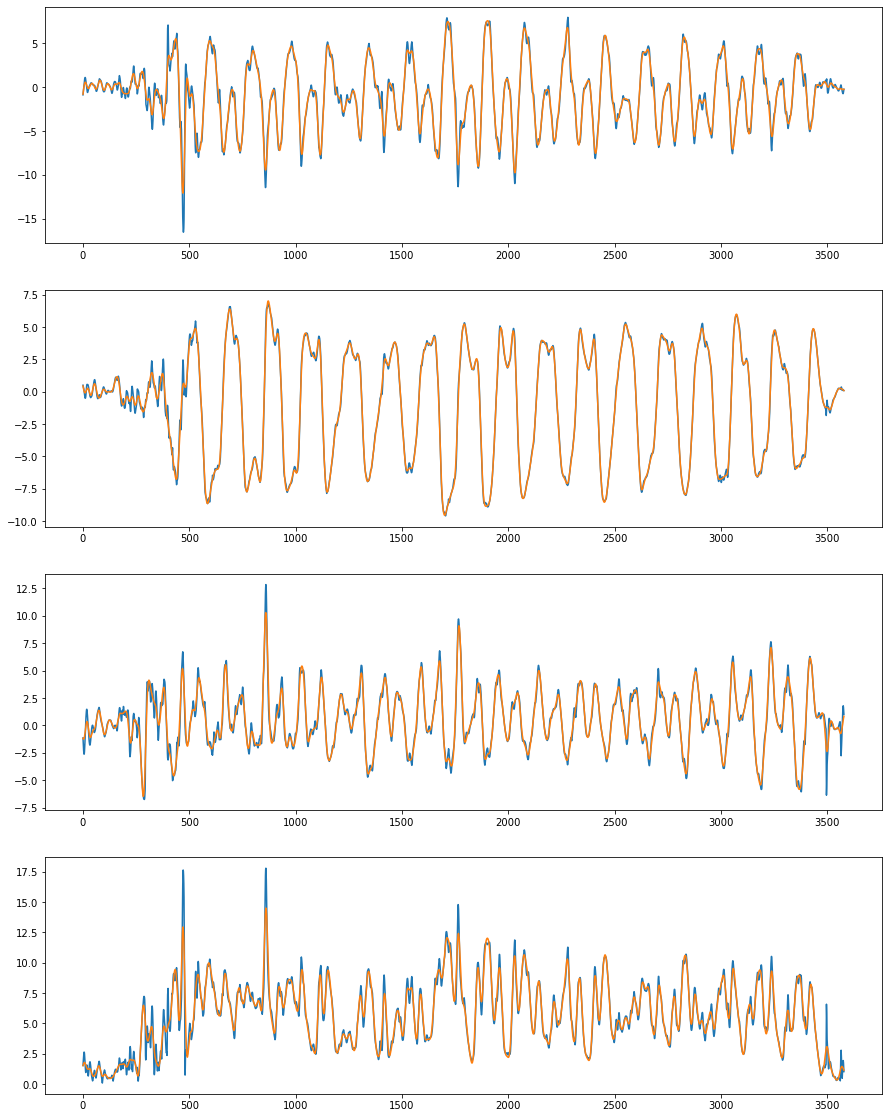

In [10]:
#Before filtering
visualise_whole()

In [7]:
#Butterworth
filter_df['ax (m/s^2)'] = bw_filter(data['ax (m/s^2)'])
filter_df['ay (m/s^2)'] = bw_filter(data['ay (m/s^2)'])
filter_df['az (m/s^2)'] = bw_filter(data['az (m/s^2)'])
filter_df['aT (m/s^2)'] = bw_filter(data['aT (m/s^2)'])



In [8]:
data

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
0,0.002084,-0.8952,0.5000,-1.1382,1.532
1,0.002422,-0.6853,0.4047,-1.5653,1.756
2,0.002640,-0.4748,0.3374,-1.9601,2.045
3,0.007486,-0.2598,0.2719,-2.2978,2.328
4,0.012352,-0.0273,0.2076,-2.5241,2.533
...,...,...,...,...,...
3574,16.944350,-0.7611,0.1712,1.7387,1.906
3575,16.949905,-0.7221,0.1576,1.7951,1.941
3576,16.953849,-0.6070,0.1252,1.6326,1.746
3577,16.958681,-0.4386,0.0965,1.3345,1.408


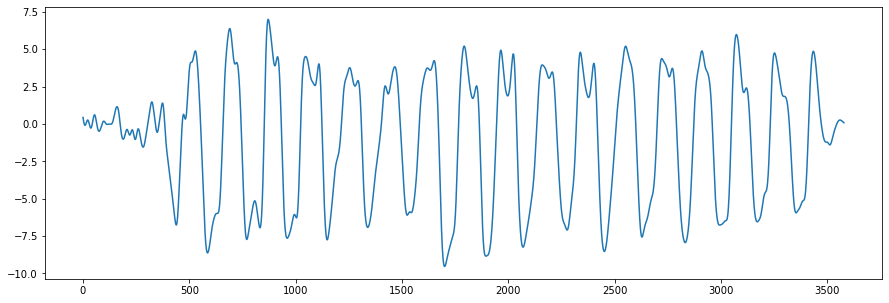

In [9]:
viz_sample()